In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pulsar_stars.csv')
df.shape

(17898, 9)

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is `target_class` variable. It is also the target variable.


Now, I will view the column names to check for leading and trailing spaces.

In [4]:
# Viewing the column names of the dataframe

col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
# Removing the leading spaces (spaces at the start of the string names)

df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
# Making the column names short by renaming them

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']


In [8]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

Our target variable is `target_class`

In [9]:
# Checking the distribution of the target_class column
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [10]:
# Viewing the percentage distribution of target_class column

df['target_class'].value_counts()/np.float32(len(df))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

The class label `0` and `1` is 90.84% and 9.16% respectively. So this is a class imbalanced problem. We will deal with that in later

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [12]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

No missing values

### Outliers in numerical variables

In [13]:
round(df.describe(), 2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Let's draw boxplots for identifying the outliers

Text(0, 0.5, 'DM-SNR Skewness')

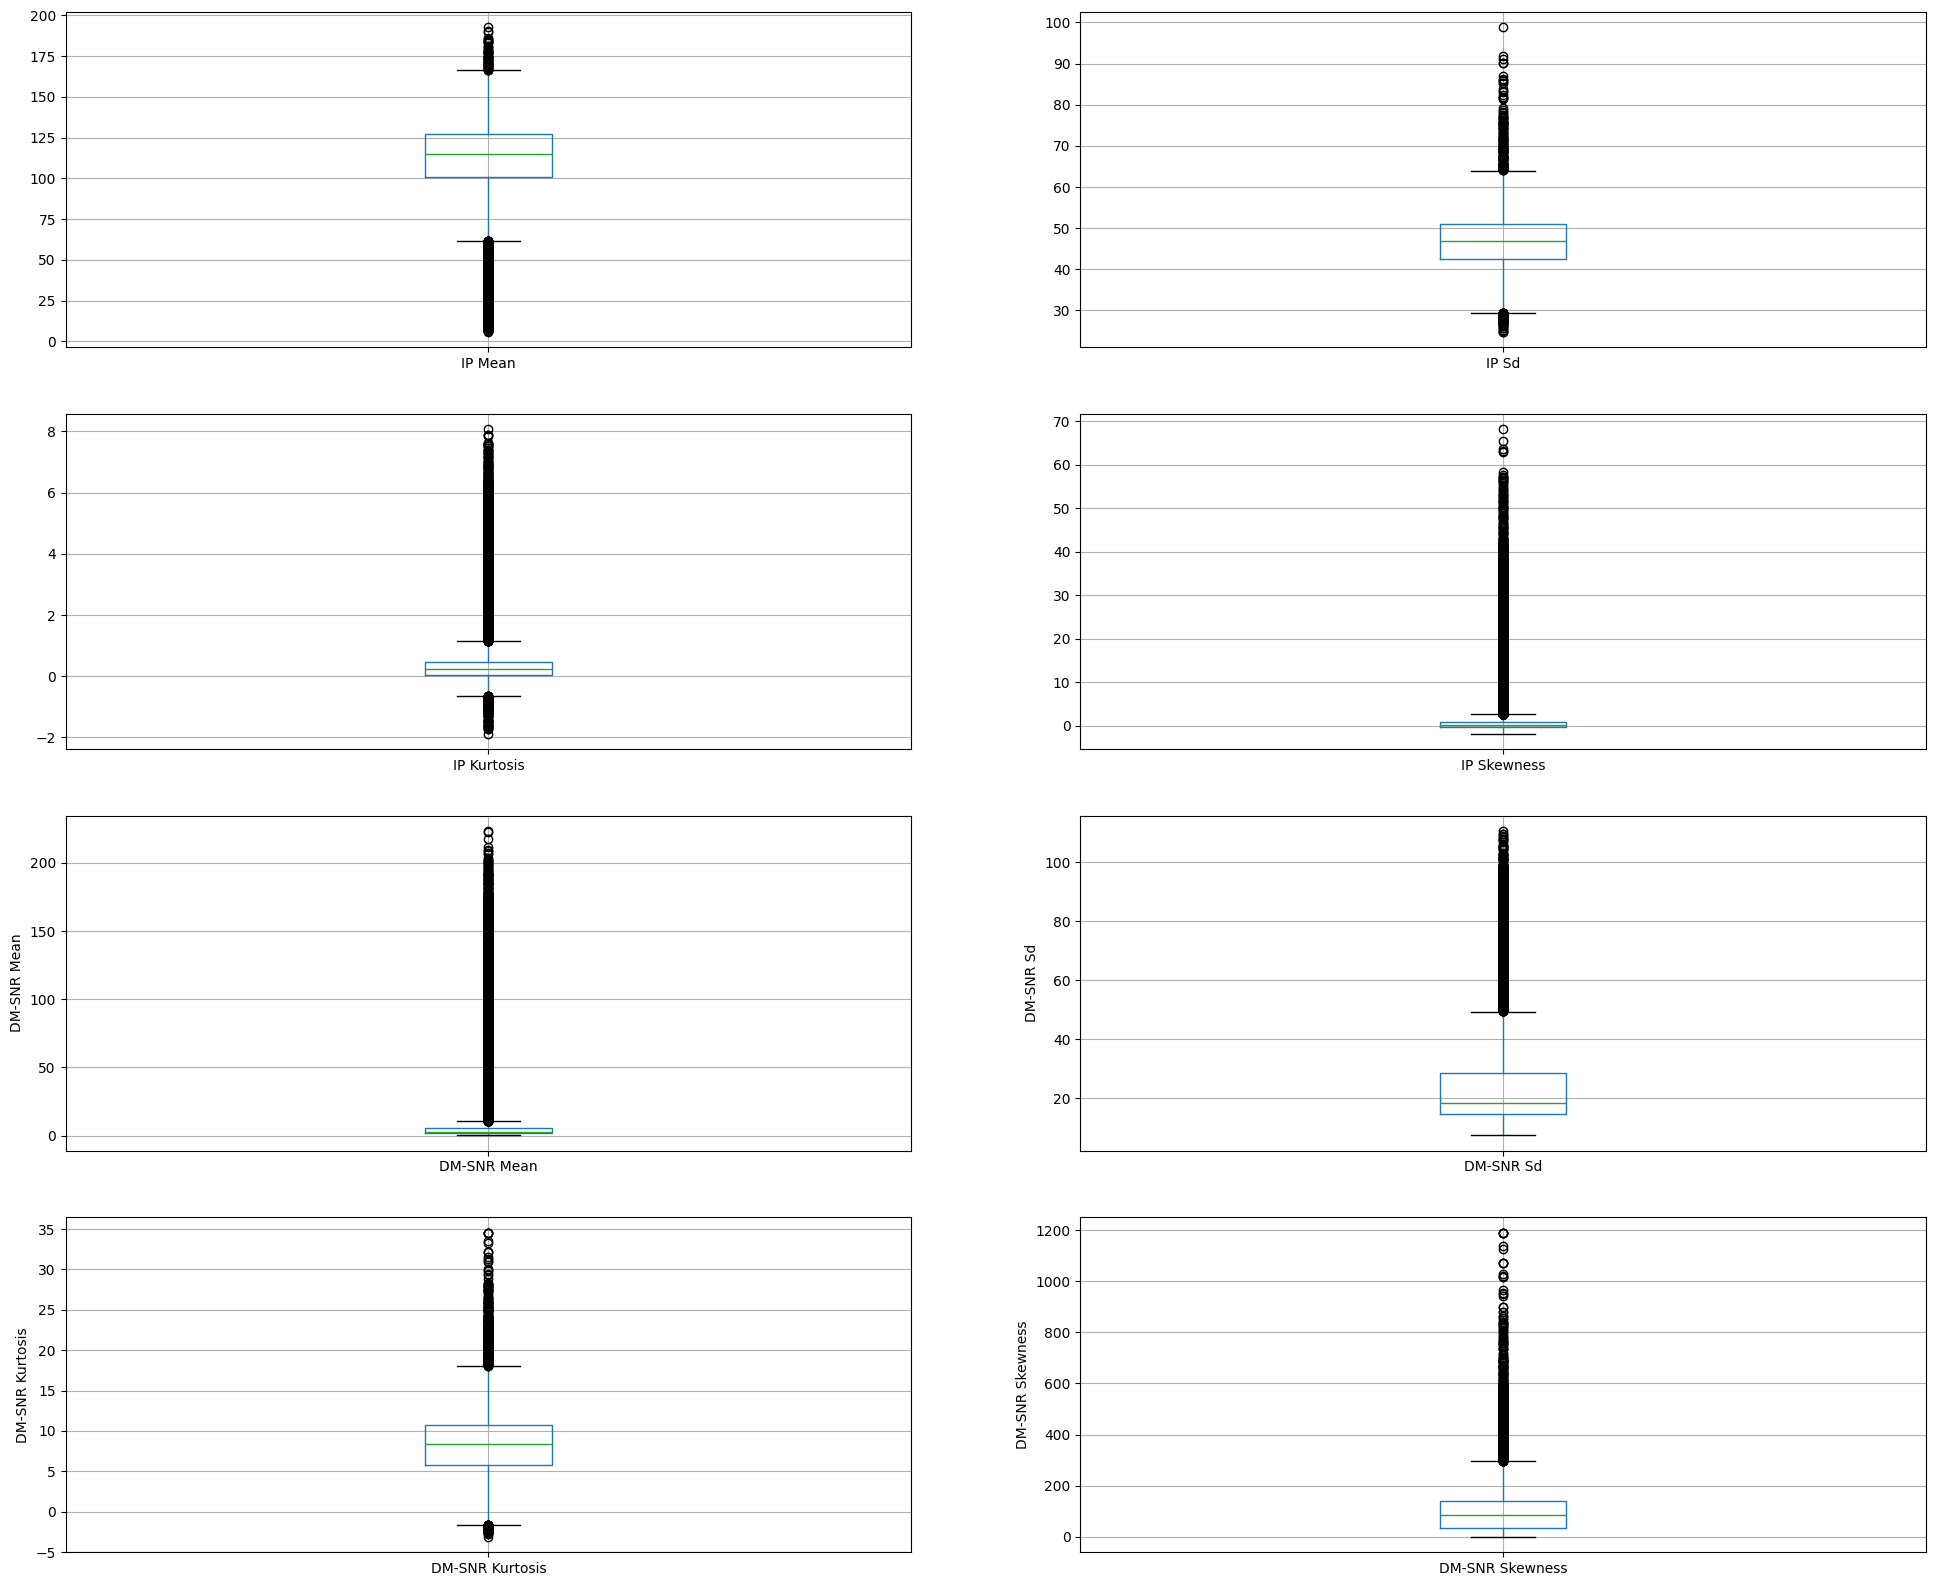

In [14]:
# Boxplots for visualizing outliers

plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column = 'IP Mean')
fig.set_title('')
fig.set_ylabel = ('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column = 'IP Sd')
fig.set_title = ('')
fig.set_ylabel = ('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column = 'IP Kurtosis')
fig.set_title = ('')
fig.set_ylabel = ('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column = 'IP Skewness')
fig.set_title = ('')
fig.set_ylabel = ('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column = 'DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column = 'DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column = 'DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column = 'DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

The above boxplot confirmed that there are a lot of outliers in these variables

### Handle outliers with SVMs


There are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or 
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The message is that since the dataset contains outliers, so the value of C should be high while training the model.

### Check the distribution of varibles

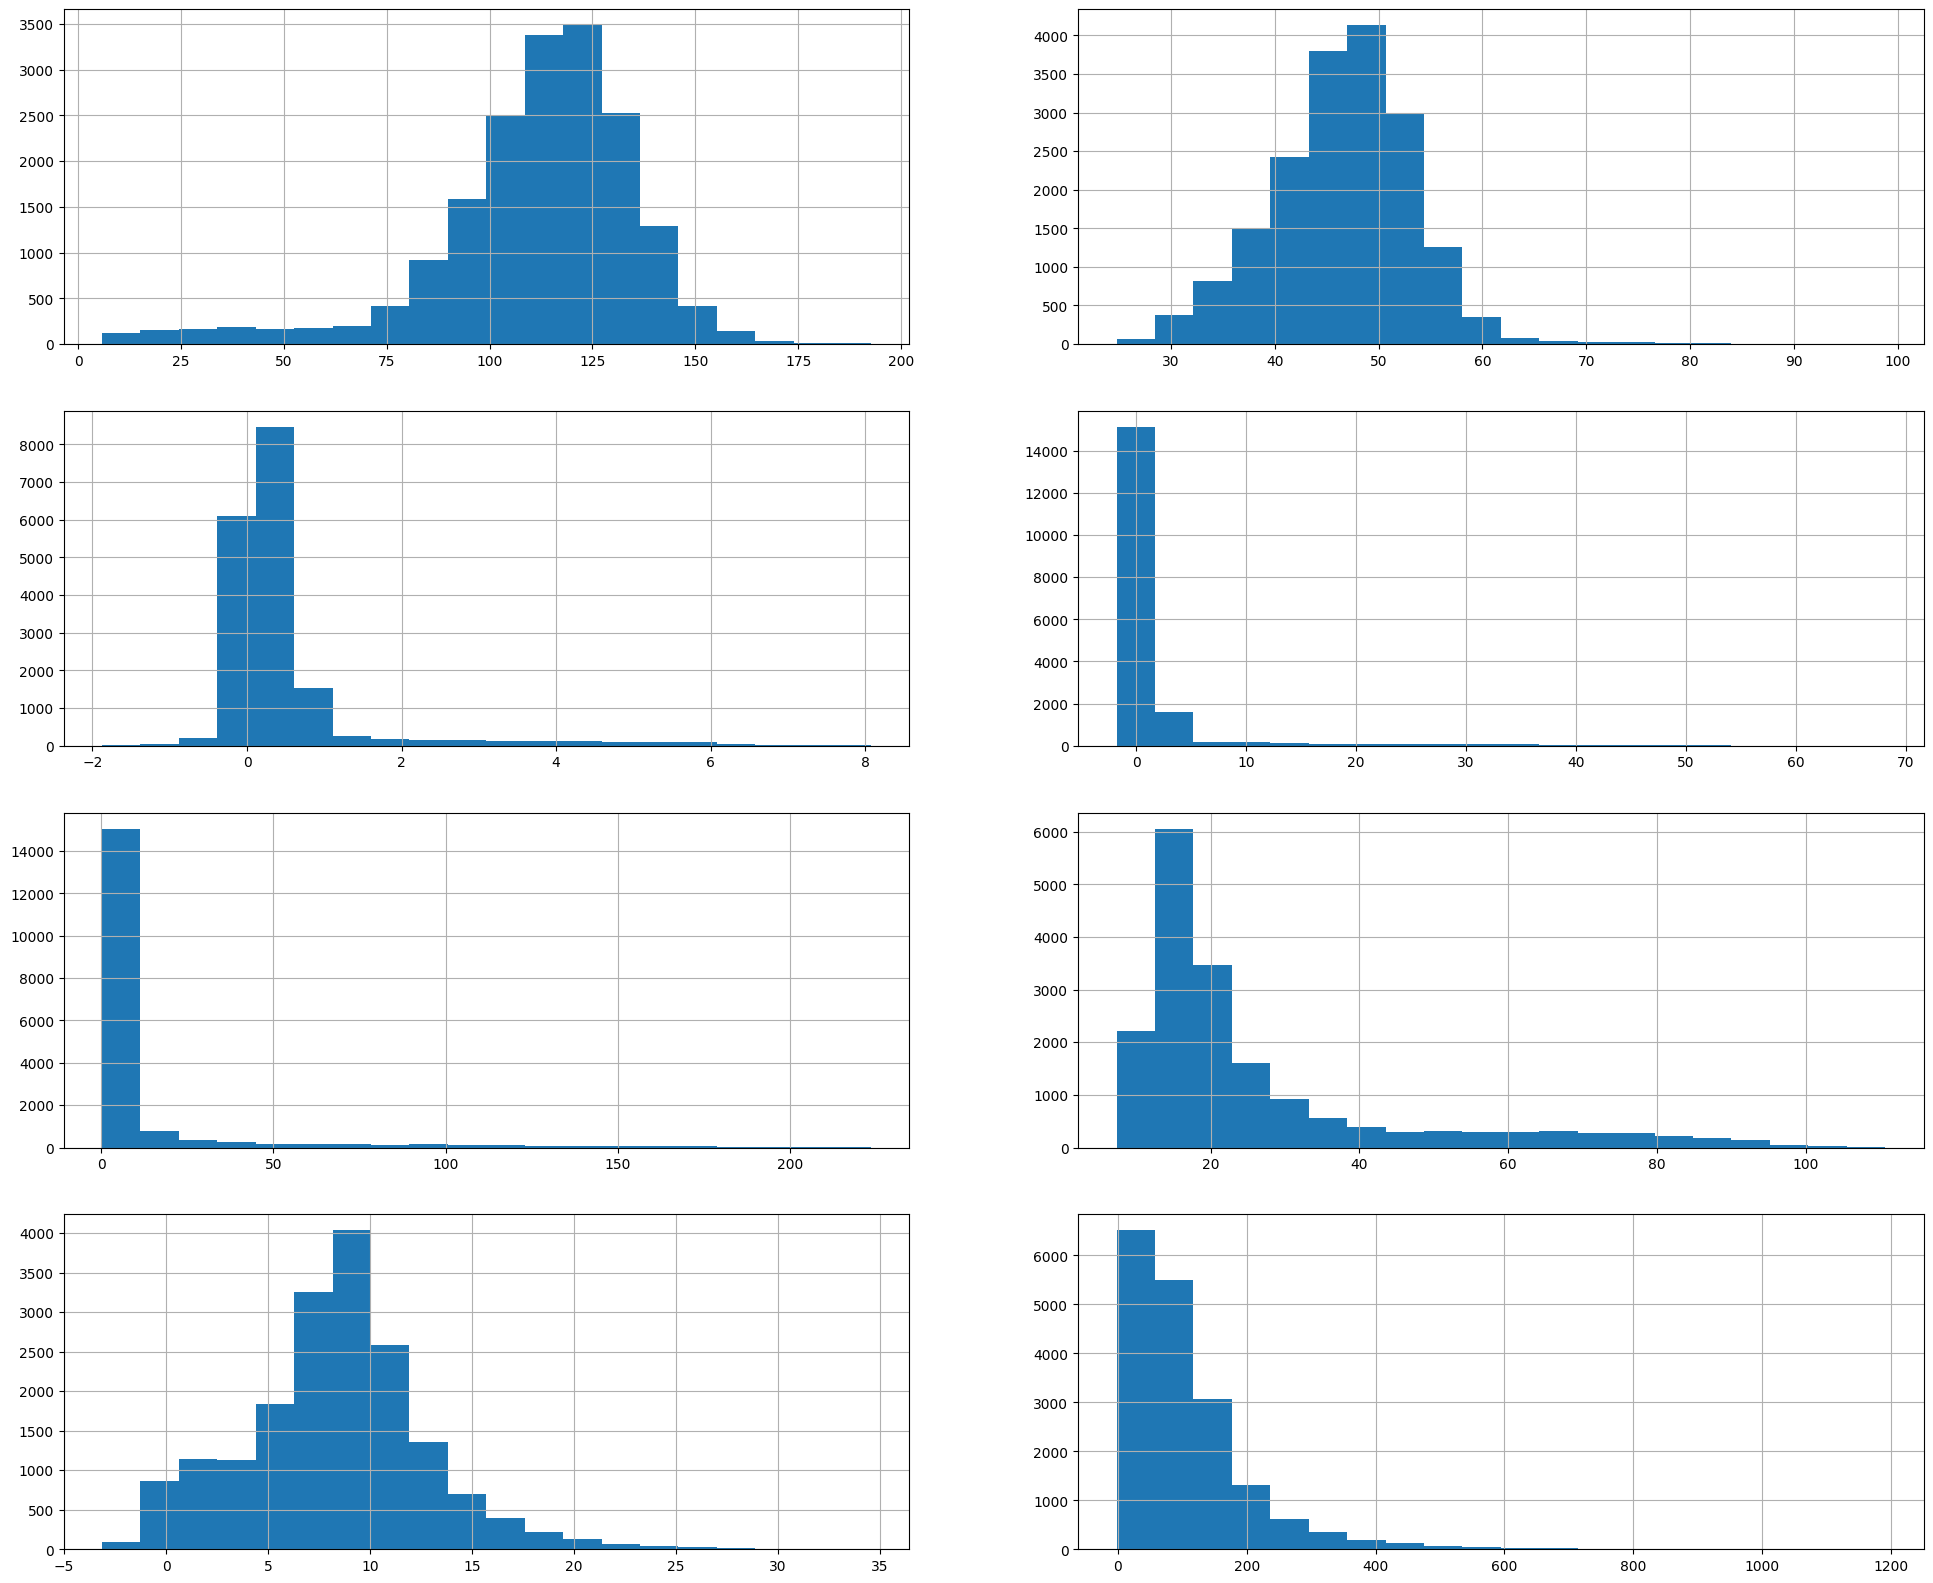

In [15]:
# Plotting histogram to check distribution

plt.figure(figsize = (24, 20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins = 20)
fig.set_xlabel = ('IP Mean')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins = 20)
fig.set_xlabel = ('IP Sd')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins = 20)
fig.set_xlabel = ('IP Kurtosis')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins = 20)
fig.set_xlabel = ('IP Skewness')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins = 20)
fig.set_xlabel = ('DM-SNR Mean')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins = 20)
fig.set_xlabel = ('DM-SNR Sd')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins = 20)
fig.set_xlabel = ('DM-SNR Kurtosis')
fig.set_ylabel = ('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins = 20)
fig.set_xlabel = ('DM-SNR Skewness')
fig.set_ylabel = ('Number of pulsar stars')



All the 8 continuous variables are skewed

# **9. Declare feature vector and target variable** 

In [16]:
x = df.drop(['target_class'], axis = 1)
y = df['target_class']

## Splitting data into training and testing set

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
x_train.shape, x_test.shape

((14318, 8), (3580, 8))

In [19]:
# Feature Scaling

cols = x_train.columns

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [21]:
x_train = pd.DataFrame(x_train, columns = [cols])
x_test = pd.DataFrame(x_test, columns = [cols])

In [22]:
x_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


In [23]:
x_test.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,0.042635,-0.011794,-0.048723,-0.038663,-0.049805,-0.034250,0.033655,0.020093
std,0.942681,0.994138,0.914699,0.901393,0.914901,0.962725,0.990423,1.021707
min,-4.049655,-2.952482,-2.051678,-0.543585,-0.423900,-0.973371,-2.528067,-1.003146
25%,-0.353337,-0.625996,-0.431670,-0.321645,-0.367643,-0.615877,-0.513822,-0.631390
50%,0.175913,0.049999,-0.244896,-0.257336,-0.338248,-0.411437,0.056068,-0.184019
75%,0.623167,0.655054,-0.031936,-0.141098,-0.257229,0.068507,0.541576,0.341052
max,2.774804,5.726307,6.494498,8.762475,6.993166,4.154784,5.818557,10.246130


### Running SVM with default parameters

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('Model accuracy score with default parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default parameters: 0.9827


### Running SVM with rbf kernel and c = 100.0

In [68]:
# To deal with outliers it is important to have a higher c value.

svc_rbf_100 = SVC(kernel = 'rbf', C = 100.0)
svc_rbf_100.fit(x_train, y_train)

y_pred = svc_rbf_100.predict(x_test)

print('Accuracy with rbf kernel and C = 100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy with rbf kernel and C = 100.0: 0.9832


In [69]:
# Taking C value 1000.0 to see the difference

svc_rbf_1000 = SVC(kernel = 'rbf', C = 1000.0)
svc_rbf_1000.fit(x_train, y_train)

y_pred = svc_rbf_1000.predict(x_test)

print('Accuracy with rbf kernel and C = 100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy with rbf kernel and C = 100.0: 0.9816


In this case the accuracy score decreased with C = 1000.0

### Running SVM with linear kernel

In [70]:
svc_linear_1 = SVC(kernel = 'linear', C = 1.0)
svc_linear_1.fit(x_train, y_train)

y_pred_test = svc_linear_1.predict(x_test)

print('Accuracy score with linear kernel and C = 1.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Accuracy score with linear kernel and C = 1.0: 0.9830


### Run SVM with linear kernel and C=100.0

In [71]:
svc_linear_100 = SVC(kernel = 'linear', C = 100.0)
svc_linear_100.fit(x_train, y_train)

y_pred = svc_linear_100.predict(x_test)

print('Accuracy score with linear kernel and C = 100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score with linear kernel and C = 100.0: 0.9832


### Run SVM with linear kernel and C = 1000.0

In [72]:
svc_linear_1000 = SVC(kernel = 'linear', C = 1000.0)
svc_linear_1000.fit(x_train, y_train)

y_pred = svc_linear_1000.predict(x_test)

print('Accuracy score with linear kernel and C = 1000.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score with linear kernel and C = 1000.0: 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

In [73]:
# Comparing the training set and test set accuracy

y_pred_train = svc_linear_1.predict(x_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
print('Training set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training set accuracy score: 0.9783


### Checking for overfitting and underfitting

In [74]:
print('Training set score: {:.4f}'.format(svc_linear_1.score(x_train, y_train)))
print('Test set accuracy: {:.4f}'.format(svc_linear_1.score(x_test, y_test)))

Training set score: 0.9783
Test set accuracy: 0.9830


The training-set accuracy score is 0.9785 while the test-set accuracy to be 0.9832. These two values are quite comparable. So, there is no question of overfitting. 


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [33]:
# checking the class distribution in the test set

y_test.value_counts()

target_class
0    3306
1     274
Name: count, dtype: int64

We can see that the occurences of most frequent class `0` is 3306. So, we can calculate null accuracy by dividing 3306 by total number of occurences.

In [34]:
# check null accuracy score

null_acc = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'.format(null_acc))

Null accuracy score: 0.9235


We can see that our model accuracy score is 0.9832 but null accuracy score is 0.9235. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

### Running SVM with polynomial kernel and C = 1.0

In [80]:

poly_svc_1 = SVC(kernel = 'poly', C = 1.0)
poly_svc_1.fit(x_train, y_train)

y_pred = poly_svc_1.predict(x_test)

print('Accuracy with polynomial kernel and C = 1.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy with polynomial kernel and C = 1.0: 0.9807


In [76]:
# To deal with outliers it is important to have a higher c value.

poly_svc_100 = SVC(kernel = 'poly', C = 100.0)
poly_svc_100.fit(x_train, y_train)

y_pred = poly_svc_100.predict(x_test)

print('Accuracy with polynomial kernel and C = 100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy with polynomial kernel and C = 100.0: 0.9824


Polynomial kernel gives poor performance. It may be overfitting the training set

### Running SVM with sigmoid kernel and C = 1.0

In [77]:

svc_sigmoid_1 = SVC(kernel = 'sigmoid', C = 1.0)
svc_sigmoid_1.fit(x_train, y_train)

y_pred = svc_sigmoid_1.predict(x_test)

print('Accuracy with sigmoid kernel and C = 100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy with sigmoid kernel and C = 100.0: 0.8858


### Running SVM with sigmoid kernel and C = 100.0

In [78]:

svc_sigmoid_100 = SVC(kernel = 'sigmoid', C = 100.0)
svc_sigmoid_100.fit(x_train, y_train)

y_pred = svc_sigmoid_100.predict(x_test)

print('Accuracy with sigmoid kernel and C = 100.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy with sigmoid kernel and C = 100.0: 0.8855


Sigmoid kernel also gives poor performance.

## Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix\n\n', cm)
print('\nTrue Positive (TP): ', cm[0, 0])
print('\nTrue Negative (TN): ', cm[1,1])
print('\nFalse Positive (FP): ', cm[0,1])
print('\nFalse Negative (FN): ', cm[1,0])

Confusion Matrix

 [[3289   17]
 [  44  230]]

True Positive (TP):  3289

True Negative (TN):  230

False Positive (FP):  17

False Negative (FN):  44


The confusion matrix shows `3289 + 230 = 3519 correct predictions` and `17 + 44 = 61 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 3289


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 230


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 17 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 44 `(Type II error)`

<Axes: >

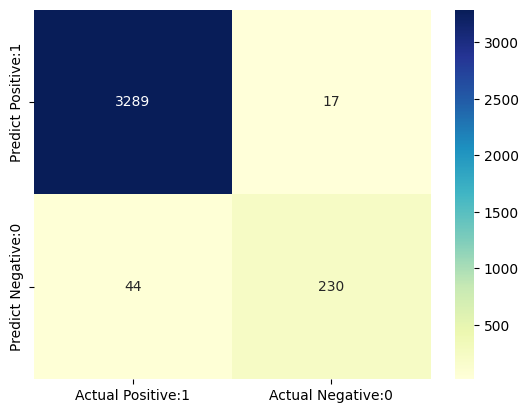

In [47]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **17. Classification metrices**

In [49]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### Classification Accuracy

In [50]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [51]:
# Printing classification report

classification_acc = (TP + TN)/float(TP + TN + FP + FN)
print('Classification Accuracy: {0:0.4f}'.format(classification_acc))

Classification Accuracy: 0.9830


### Classification Error

In [56]:
# Printing classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification Error: {0:0.4f}'.format(classification_error))

Classification Error: 0.0170


#### Precision

In [58]:
# Print precision score

precision = TP / float(TP + FP)
print('Precision Score: {0:0.4f}'.format(precision))

Precision Score: 0.9949


### Recall

In [59]:
recall = TP / (TP + FN)
print('Recall Score: {0:0.4f}'.format(recall))

Recall Score: 0.9868


In [62]:
# True Positive rate

true_positive = TP / float(TP + FN)
print('True Positive Rate: {0:0.4f}'.format(true_positive))

True Positive Rate: 0.9868


In [65]:
# False Positive Rate

false_positive = FP / float(FP + TN)
print('False Positive Rate: {0:0.4f}'.format(false_positive))

False Positive Rate: 0.0688


In [66]:
# Speficity

speficity = TN / (TN + FP)
print('Speficity: {0:0.4f}'.format(speficity))

Speficity: 0.9312


In [67]:
# F1-score 

f1_score = 2 * ((precision * recall) / (precision + recall))
print('F1-Score: {0:0.4f}'.format(f1_score))

F1-Score: 0.9908


### Saving all the models giving high accuracy

In [79]:
import pickle

# Saving the SVM models

# Save the default SVC model
with open('svc_default_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

# Save the SVC model with rbf kernel and C = 100.0
with open('svc_rbf_100_model.pkl', 'wb') as file:
    pickle.dump(svc_rbf_100, file)

# Save the SVC model with rbf kernel and C = 1000.0
with open('svc_rbf_1000_model.pkl', 'wb') as file:
    pickle.dump(svc_rbf_1000, file)

# Save the SVC model with linear kernel and C = 1.0
with open('svc_linear_1_model.pkl', 'wb') as file:
    pickle.dump(svc_linear_1, file)

# Save the SVC model with linear kernel and C = 100.0
with open('svc_linear_100_model.pkl', 'wb') as file:
    pickle.dump(svc_linear_100, file)

# Save the SVC model with linear kernel and C = 1000.0
with open('svc_linear_1000_model.pkl', 'wb') as file:
    pickle.dump(svc_linear_1000, file)

# Save the SVC model with polynomial kernel and C = 1.0
with open('poly_svc_1_model.pkl', 'wb') as file:
    pickle.dump(poly_svc_1, file)

# Save the SVC model with polynomial kernel and C = 100.0
with open('poly_svc_100_model.pkl', 'wb') as file:
    pickle.dump(poly_svc_100, file)

# Save the SVC model with sigmoid kernel and C = 1.0
with open('svc_sigmoid_1_model.pkl', 'wb') as file:
    pickle.dump(svc_sigmoid_1, file)

# Save the SVC model with sigmoid kernel and C = 100.0
with open('svc_sigmoid_100_model.pkl', 'wb') as file:
    pickle.dump(svc_sigmoid_100, file)
